In [1]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Optional for visualization
import matplotlib.pyplot as plt


In [2]:
train_data_dir = "C:\\Users\\anuhy\\Downloads\\pneumonia\\chest_xray\\train"
val_data_dir = "C:\\Users\\anuhy\\Downloads\\pneumonia\\chest_xray\\val"

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),  # Adjust image size as needed
    batch_size=32,
    class_mode='binary'  # Binary classification (pneumonia vs. normal)
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [5]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))  # Load pre-trained ResNet50 without the top layers


# Freeze the base model layers (optional)
for layer in base_model.layers:
    layer.trainable = False


In [6]:
x = base_model.output
x = Flatten()(x)  # Flatten the output of the base model
x = Dense(1024, activation='relu')(x)  # Add a dense layer with ReLU activation
x = Dropout(0.5)(x)  # Add dropout for regularization
predictions = Dense(1, activation='sigmoid')(x)  # Final output layer with sigmoid for binary classification


In [7]:
model = tf.keras.Model(inputs=base_model.input, outputs=predictions)  # Create the final model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss="binary_crossentropy",metrics=["acc"])
history = model.fit(train_generator, epochs=10, validation_data=val_generator)  # Train the model

Epoch 1/5


C:\Users\anuhy\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 1452s 9s/step - acc: 0.6991 - loss: 2.7297 - val_acc: 0.6250 - val_loss: 0.6400
Epoch 2/5
 46/163 ━━━━━━━━━━━━━━━━━━━━ 18:46 10s/step - acc: 0.7855 - loss: 0.4684

KeyboardInterrupt: 

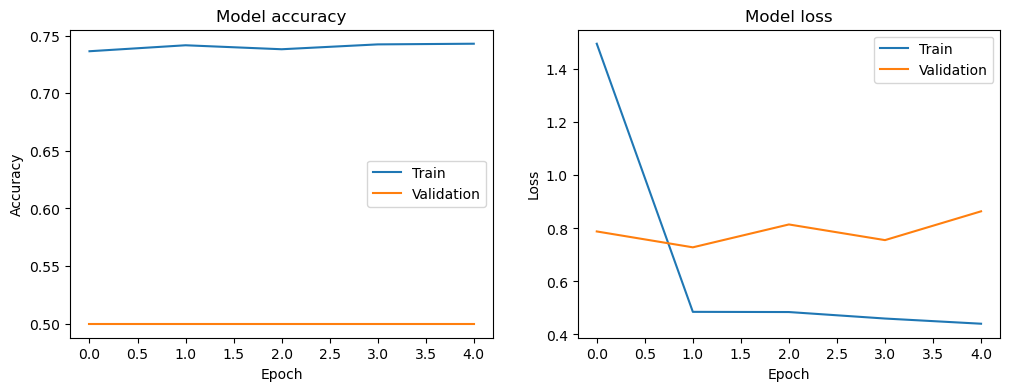

In [8]:
# Plot training and validation accuracy/loss (if desired)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()
